In [1]:
import pandas as pd

df_wine = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch04/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [44]:
#Wineデータの標準化

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y =df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# pd.DataFrame(X_train_std)

In [58]:
#共分散行列の算出

import numpy as np

cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
pd.DataFrame(eigen_vecs)
# eigen_vecs

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.122211,-0.499277,0.128294,0.011360,0.359625,-0.230483,-0.047140,0.394509,-0.378735,0.104091,-0.073499,0.457553,-0.099269
1,-0.243910,-0.154191,-0.133782,-0.546997,0.016986,-0.609771,0.353882,0.032303,0.072474,-0.030356,0.050933,-0.299840,-0.050714
2,0.003695,-0.251701,-0.687928,0.239005,0.053367,-0.095141,-0.138105,-0.114523,0.422134,-0.080051,-0.038231,0.185811,-0.376276
3,-0.249647,0.122696,-0.593772,-0.008210,-0.023909,0.081184,-0.204975,0.387578,-0.337885,0.056592,-0.067694,-0.127174,0.482152
4,0.130110,-0.314204,-0.084972,0.239533,-0.780231,-0.094782,0.282585,-0.074843,-0.294833,0.052312,0.143399,0.073231,0.031021
5,0.390994,-0.055957,-0.192686,-0.190385,0.144781,0.087772,0.098200,-0.392216,-0.372904,-0.538508,-0.377075,-0.062146,0.058131
6,0.416492,0.026374,-0.175573,-0.127105,0.098095,0.023990,0.001577,-0.213308,-0.108147,0.793396,-0.155027,-0.224681,-0.086421
7,-0.315700,-0.073625,-0.141447,0.143978,0.362313,0.349964,0.661356,-0.231892,-0.101134,0.123891,0.230986,0.145606,0.095560
8,0.298248,0.010947,-0.108318,-0.507975,-0.193878,0.446727,0.262865,0.433799,0.290792,-0.035439,-0.017267,0.242455,-0.042729
9,-0.073040,-0.539610,0.045663,-0.129064,0.049606,0.412168,-0.265967,0.029185,-0.103123,-0.082230,0.335362,-0.519556,-0.202503


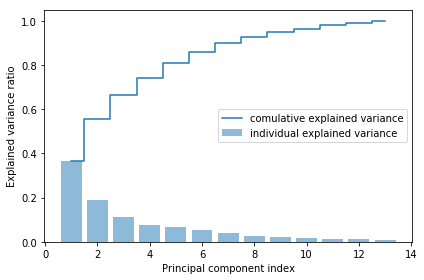

In [30]:
#分散説明率の算出
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(eigen_vals)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')

plt.step(range(1,len(eigen_vals)+1), cum_var_exp, where='mid', label='comulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [77]:
#固有値、固有ベクトル、データPCA変換
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

# w

X_train_pca = X_train_std.dot(w)
# pd.DataFrame(X_train_pca)

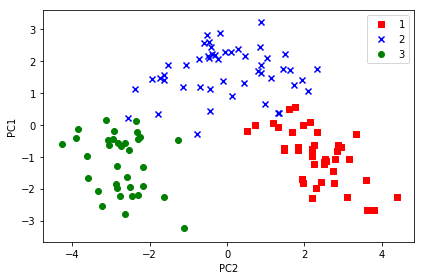

In [78]:
#PCA変換後プロット
colors =['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0], X_train_pca[y_train==l,1], c=c, label=l, marker=m)
    
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [86]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), label=cl, edgecolor='black', marker=markers[idx])
    

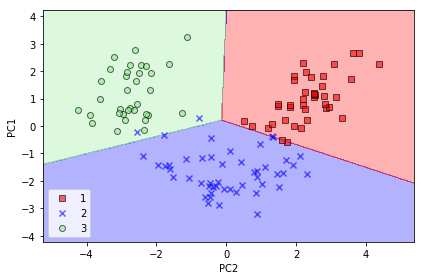

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

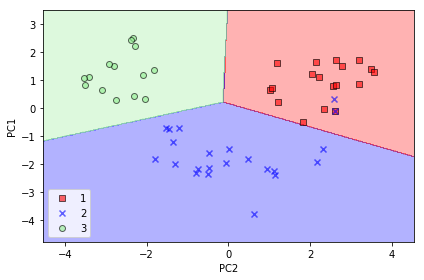

In [92]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [93]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36584757, 0.19074656, 0.11010266, 0.07622236, 0.06677399,
       0.05174628, 0.04046205, 0.02676539, 0.02170402, 0.01520954,
       0.01447227, 0.01130043, 0.00864689])